## Q1. Using Linear Regression (OLS), predict the salary on the basis of years of experience. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('Salary_data.csv')

data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [3]:
X = data['YearsExperience']
y = data['Salary']

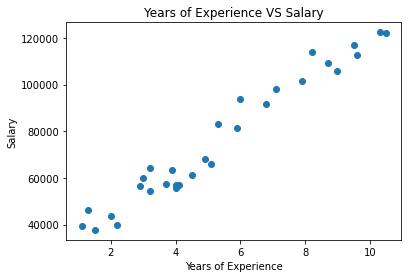

In [7]:
plt.title('Years of Experience VS Salary')
plt.scatter(X, y)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

**Defining the OLS Model**

In [16]:
class OLS:
    def __init__(self):
        self.bias = None
        self.weight = None
        
    def fit(self, X, y):
        # calculating the mean of independent and dependent variable
        x_mean = X.mean()
        y_mean = y.mean()
        
        # initialising the value of numerator and denominator for the calculation of weight
        num = 0
        den = 0
        
        for i in range(len(X)):
            num += (X[i] - x_mean) * (y[i] - y_mean)
            den += (X[i] - x_mean) ** 2
            
        # calculating weight and bias
        self.weight = num / den
        self.bias = y_mean - (self.weight * x_mean)
        
    def predict(self, X):
        return self.bias + (self.weight * X)
    
    def r_square_score(self, y_test, y_pred):
        tss = 0
        rss = 0
        y_test_mean = y_test.mean()
        
        for i in range(len(y_test)):
            tss += (y_test[i] - y_test_mean) ** 2
            rss += (y_test[i] - y_pred[i]) ** 2
            
        score = 1 - (rss / tss)
        return score

**Splitting the dataset into training and testing data.**

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

**Fitting the model on training set and predicting the values for testing set.**

In [17]:
model = OLS()

model.fit(np.array(X_train), np.array(y_train))

y_pred = model.predict(X_test)

print(f'Weight: {model.weight}')
print(f'Bias: {model.bias}')

Weight: 9731.203838245372
Bias: 25202.887786154904


**Plotting the line of regression.**

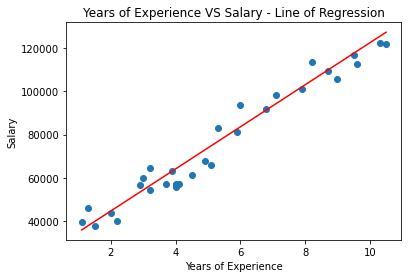

In [18]:
plt.title('Years of Experience VS Salary - Line of Regression')
plt.scatter(X, y)
plt.plot(X, model.bias + (model.weight * X), 'r-')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

**R-square Score**

In [19]:
print(f'R-square Score: {model.r_square_score(np.array(y_test), np.array(y_pred))}')

R-square Score: 0.9627668685473267
